# 1 Data Loading & Cleansing

## Notes/Questions to discuss:
1.	I removed 59 SPI companies without Total ESG Score, 1 duplicate company (Schindler, see 1.4), and 4 S&P 500 companies without Total ESG Score **(see section 1.3.1)**.</br>
    *Remark Marisa: Makes sense*
2.	**To discuss:** Should we remove SPI companies whose Country is not Switzerland? (There are 5 with ESG scores.) Should we remove a few S&P companies whose country is not US? **(See 1.3.2)**</br>
    *Remark Marisa: I would remove non swiss companies from SPI. Also only take US companies from S&P 500 because 96% are from the US. I added code to show this so we can argue properly*
3.	I removed financial indicators due to a large amount of missing data: PE_Ratio, EBITDA_Margin_%, Debt_to_Equity, Current_Ratio, and Operating_Cash_Flow **(see 1.3.5)**.</br>
    *Remark Marisa: Makes sense to me.*
4.	Depending on the metrics and industries chosen for further analysis, we may need to remove additional S&P 500 data due to the unbalanced size of the two datasets and missing values. However, the S&P 500 dataset is mainly used for support and comparison, so we do not perform a deep analysis on it and adjust it according to the SPI dataset **(see 1.3.5)**. </br>
    *Remark Marisa: Fine for me for now. But I will keep it in mind for further analysis*
5.	Outliers should be addressed (keep or remove) during the analysis and comparison of specific metrics based on their observed distributions **(see 4.3)**. </br>
    *Remark Marisa: Same as above. I would keep these for now and think about removing them when we analyse them for our research questions.*
6.	The merged and cleaned dataset is saved as `cleaned_combined_data.csv` in the Data folder. Additional columns have been added:
    - Company_Type to identify SPI vs S&P 500 companies
    - ESG Risk Classification according to the ESG Risk Ratings Methodology **(see 5.2)**

## 1.1  Import packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 1.2  Load Data

Firstly, we load the tickers which were originally downloaded from wikipedia and checked with ...

In [5]:
 spi = pd.read_csv("Data/esg_financial_analysis_spi.csv")
sp500 = pd.read_csv("Data/esg_financial_analysis_sp500.csv")

Then we check the structure of the SPI dataset. I contains 201 observations with 34 variables.
On the first glance, we see that we don't have all variables of all observations. We therefore need to look into that closer.
(i.e. 142 Total ESG Scores out of 201 observations)

In [6]:
# SPI dataset overview
print(spi.shape)
spi.describe()

(201, 34)


,Total_ESG_Score,Environmental_Score,Social_Score,Governance_Score,Highest_Controversy,Stock_Price,Current_Price,Market_Cap,PE_Ratio,PB_Ratio,...,ROE_%,ROA_%,Profit_Margin_%,EBITDA_Margin_%,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_%
count,142.000000,71.000000,71.000000,71.000000,141.000000,197.000000,200.000000,2.000000e+02,151.000000,199.000000,...,187.000000,191.000000,195.000000,163.000000,195.000000,190.000000,158.000000,171.000000,1.780000e+02,197.000000
mean,22.166127,5.776479,8.240423,5.491690,0.574468,831.009442,1012.785667,9.631342e+09,29.529007,3.566784,...,4.340214,2.738115,41.534974,-55.886442,472.790103,0.664337,114.213291,7.039825,8.196861e+08,19.085736
std,7.795570,4.963638,3.330291,2.194745,0.880211,6975.072465,9290.522167,2.934215e+10,40.652069,13.368681,...,44.422322,7.831413,289.331283,694.585747,6176.006216,0.468320,301.059794,57.997245,2.941789e+09,219.988917
min,8.560000,0.000000,0.640000,1.070000,0.000000,0.050000,0.021000,1.046500e+05,0.040000,-51.520000,...,-288.140000,-27.200000,-133.720000,-8713.510000,-28.810000,-0.464000,0.280000,0.020000,-4.749700e+09,-100.000000
25%,15.647500,1.735000,5.755000,4.235000,0.000000,25.720000,23.287500,2.980722e+08,13.945000,0.860000,...,2.155000,0.635000,1.075000,5.585000,0.275000,0.299000,21.365000,1.025000,1.769750e+07,-4.530000
50%,22.320000,3.920000,8.790000,5.010000,0.000000,76.950000,80.100000,1.277347e+09,19.470000,1.670000,...,8.100000,2.210000,8.050000,12.700000,4.000000,0.670500,56.305000,1.510000,8.006650e+07,1.160000
75%,27.620000,9.985000,10.495000,6.795000,1.000000,219.000000,222.750000,4.323705e+09,30.865000,3.725000,...,15.920000,6.600000,20.795000,23.645000,9.695000,0.962500,109.325000,2.385000,4.161617e+08,7.060000
max,49.050000,17.020000,16.750000,10.960000,4.000000,97134.130000,130600.000000,2.250000e+11,443.330000,172.410000,...,163.700000,50.970000,3663.790000,116.370000,86227.180000,2.164000,3322.760000,758.290000,2.078800e+10,3028.010000


We do the same for the S&P 500 dataset. It contains 503 observations with 34 variables.
Here we see as well that we have some NAs for certain variables.

In [4]:
# S&P 500 dataset overview
print(sp500.shape)
sp500.describe()

(503, 34)


,Total_ESG_Score,Environmental_Score,Social_Score,Governance_Score,Highest_Controversy,Stock_Price,Current_Price,Market_Cap,PE_Ratio,PB_Ratio,...,ROE_%,ROA_%,Profit_Margin_%,EBITDA_Margin_%,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_%
count,499.000000,498.000000,498.000000,498.000000,499.000000,502.000000,502.000000,5.020000e+02,481.000000,502.000000,...,470.000000,497.000000,502.000000,472.000000,502.000000,498.000000,448.000000,479.000000,4.800000e+02,500.000000
mean,19.696874,6.284578,8.552189,4.879398,1.857715,215.663307,227.571006,1.259593e+11,46.928586,0.559502,...,54.577915,6.880845,14.087331,27.493856,8.428645,1.013574,128.956339,1.717307,5.993221e+09,6.439480
std,6.514326,5.181406,3.338138,2.206783,0.721024,473.754473,475.868398,4.021276e+11,172.501480,99.482902,...,629.242864,5.999728,14.225745,17.600209,23.772922,0.441959,186.472883,3.007922,1.494506e+10,14.263577
min,6.680000,0.040000,0.890000,1.430000,0.000000,9.170000,8.140000,6.353985e+09,4.850000,-2181.440000,...,-183.280000,-14.770000,-94.310000,-99.580000,-24.130000,-0.025000,0.050000,0.040000,-1.076700e+10,-52.640000
25%,14.850000,2.302500,6.252500,3.510000,2.000000,68.270000,70.182500,2.030554e+10,17.860000,1.772500,...,9.072500,3.160000,7.297500,16.212500,2.360000,0.719250,39.340000,0.880000,1.234506e+09,0.030000
50%,18.840000,4.680000,8.585000,4.425000,2.000000,119.620000,130.635000,3.900935e+10,25.430000,3.160000,...,15.560000,5.390000,13.080000,24.590000,5.240000,1.006500,74.170000,1.240000,2.367156e+09,4.895000
75%,23.330000,9.730000,10.610000,5.637500,2.000000,227.727500,245.275000,8.590036e+10,35.100000,7.317500,...,28.797500,8.850000,20.200000,36.695000,9.157500,1.274500,144.727500,1.840000,4.910900e+09,10.592500
max,41.260000,24.790000,20.120000,20.210000,5.000000,8005.950000,7605.880000,4.430000e+12,3519.500000,175.810000,...,13631.680000,53.090000,73.170000,92.610000,473.090000,3.684000,2149.330000,60.310000,1.360000e+11,114.200000


## 1.3 Data cleansing

*Remark MT: cant we remove this first step because we handle it in more detail later?* </br>
We now look into more detail of missing data: We look at the count and the percentage of the amount of data missing. </br>
Especially for the ESG, we see some missing data which we need to look into closer.

In [7]:
def missing_summary(df, name):
    missing_count = df.isnull().sum()
    missing_pct = (missing_count / len(df) * 100).round(2)
    return pd.DataFrame({
        "Dataset": name,
        "Missing Count": missing_count,
        "Missing %": missing_pct
    })

In [6]:
missing_summary(spi, "SPI")

,Dataset,Missing Count,Missing %
Ticker,SPI,0,0.00
Company_Name,SPI,2,1.00
Currency,SPI,1,0.50
Data_Date,SPI,0,0.00
Industry,SPI,6,2.99
Sector,SPI,6,2.99
Country,SPI,6,2.99
Total_ESG_Score,SPI,59,29.35
Environmental_Score,SPI,130,64.68
Social_Score,SPI,130,64.68


In [7]:
missing_summary(sp500, "SP500")

,Dataset,Missing Count,Missing %
Ticker,SP500,0,0.00
Company_Name,SP500,0,0.00
Currency,SP500,1,0.20
Data_Date,SP500,0,0.00
Industry,SP500,1,0.20
Sector,SP500,1,0.20
Country,SP500,1,0.20
Total_ESG_Score,SP500,4,0.80
Environmental_Score,SP500,5,0.99
Social_Score,SP500,5,0.99


### 1.3.1 Missing ESG data

In [8]:
def check_esg_missing(df, name):
    """Check proportion of missing ESG scores"""
    esg_columns = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score', 'ESG_Performance', 'Highest_Controversy']
    esg_scores_columns = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score']
    
    print(f"\n{name} - ESG Data Availability:")
    for col in esg_columns:
        if col in df.columns:
            missing_count = df[col].isnull().sum()
            missing_pct = (missing_count / len(df) * 100)
            print(f"  {col}: {missing_count}/{len(df)} missing ({missing_pct:.2f}%)")
    
    # Overall ESG availability
    has_total_esg = df[['Total_ESG_Score']].notnull().all(axis=1)
    has_all_esg_scores = df[esg_scores_columns].notnull().all(axis=1)
    has_all_esg_data = df[esg_columns].notnull().all(axis=1)
    companies_with_total_esg = has_total_esg.sum()
    companies_without_total_esg = len(df) - companies_with_total_esg
    companies_with_all_esg_scores = has_all_esg_scores.sum()
    companies_with_all_esg_data = has_all_esg_data.sum()
    
    print(f"\n  Companies WITHOUT Total ESG scores: {companies_without_total_esg} ({companies_without_total_esg/len(df)*100:.2f}%)")
    print(f"  Companies WITH Total ESG score: {companies_with_total_esg} ({companies_with_total_esg/len(df)*100:.2f}%)")
    print(f"  Companies WITH all ESG scores: {companies_with_all_esg_scores} ({companies_with_all_esg_scores/len(df)*100:.2f}%)")
    print(f"  Companies WITH all ESG data: {companies_with_all_esg_data} ({companies_with_all_esg_data/len(df)*100:.2f}%)")

spi_no_esg = check_esg_missing(spi, "SPI")
sp500_no_esg = check_esg_missing(sp500, "S&P 500")


SPI - ESG Data Availability:
  Total_ESG_Score: 59/201 missing (29.35%)
  Environmental_Score: 130/201 missing (64.68%)
  Social_Score: 130/201 missing (64.68%)
  Governance_Score: 130/201 missing (64.68%)
  ESG_Performance: 59/201 missing (29.35%)
  Highest_Controversy: 60/201 missing (29.85%)

  Companies WITHOUT Total ESG scores: 59 (29.35%)
  Companies WITH Total ESG score: 142 (70.65%)
  Companies WITH all ESG scores: 71 (35.32%)
  Companies WITH all ESG data: 71 (35.32%)

S&P 500 - ESG Data Availability:
  Total_ESG_Score: 4/503 missing (0.80%)
  Environmental_Score: 5/503 missing (0.99%)
  Social_Score: 5/503 missing (0.99%)
  Governance_Score: 5/503 missing (0.99%)
  ESG_Performance: 4/503 missing (0.80%)
  Highest_Controversy: 4/503 missing (0.80%)

  Companies WITHOUT Total ESG scores: 4 (0.80%)
  Companies WITH Total ESG score: 499 (99.20%)
  Companies WITH all ESG scores: 498 (99.01%)
  Companies WITH all ESG data: 498 (99.01%)


Summary: 

Missing ESG data in the S&P 500 dataset is negligible, but in SPI dataset, only 71/201 companies have full ESG data, and 142 have Total ESG Score as well as ESG_Performance indicator. Removing the 130 companies without detailed scores would be too much, instead, we could remove 59/201 SPI companies without the Total ESG Score, and consider dividing the remaining companies into two subgroups for further analysis: 
- 142 companies with Total ESG Score 
- and 71 with full ESG data

In [8]:
spi_esg = spi.dropna(subset=['Total_ESG_Score'])
print(spi_esg.shape)
print(spi_esg['Total_ESG_Score'].isnull().sum())

(142, 34)
0


In [9]:
sp500_esg = sp500.dropna(subset=['Total_ESG_Score'])
print(sp500_esg.shape)
print(sp500_esg['Total_ESG_Score'].isnull().sum())

(499, 34)
0


### 1.3.2 Country Issues

Next, we look at the headquarters of the companies because...

In [10]:
non_swiss = spi_esg[spi_esg["Country"] != "Switzerland"]
print(non_swiss[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

      Ticker                                      Company_Name        Country  Total_ESG_Score
21    AMS.SW                                      ams-OSRAM AG        Austria            17.61
44   COPN.SW                        Cosmo Pharmaceuticals N.V.        Ireland            29.37
124  LLBN.SW  Liechtensteinische Landesbank Aktiengesellschaft  Liechtenstein            28.14
156  VPBN.SW                                        VP Bank AG  Liechtenstein            28.06
170  PKTM.SW                                PIERER Mobility AG        Austria             8.88


TODO: Consider if we should remove these non-swiss companies from SPI dataset

Next, we check if companies in the SPI are also in the S&P 500. ???

In [11]:
sp500_swiss = sp500_esg[sp500_esg["Country"] == "Switzerland"]
print(sp500_swiss[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

    Ticker   Company_Name      Country  Total_ESG_Score
23    AMCR      Amcor plc  Switzerland            14.31
41    APTV      Aptiv PLC  Switzerland            12.89
101     CB  Chubb Limited  Switzerland            20.12
206   GRMN    Garmin Ltd.  Switzerland            21.23


In [13]:
check_duplicates = sp500_esg['Company_Name'].tolist()
matching_spi = spi_esg[spi_esg['Company_Name'].isin(check_duplicates)]

print(matching_spi[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

Empty DataFrame
Columns: [Ticker, Company_Name, Country, Total_ESG_Score]
Index: []


So: No overlapping companies

We want to see the distribution of countries in the S&P dataset. Because approx 96% of the companies are based in the US, we decide to focus on Swiss vs. US companies.

In [13]:
country_counts = sp500_esg['Country'].value_counts(dropna=False)
country_pct = (country_counts / len(sp500_esg) * 100).round(2)

country_summary = pd.DataFrame({
    'Count': country_counts,
    'Percentage (%)': country_pct
})

print("S&P 500 — Country distribution:")
display(country_summary)

S&P 500 — Country distribution:


,Count,Percentage (%)
Country,,
United States,478,95.79
Ireland,9,1.80
Switzerland,4,0.80
United Kingdom,3,0.60
Bermuda,2,0.40
Canada,1,0.20
Netherlands,1,0.20
Singapore,1,0.20


In [12]:
sp500_nonUS = sp500_esg[sp500_esg["Country"] != "United States"]
print(sp500_nonUS[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

    Ticker                                 Company_Name         Country  Total_ESG_Score
4      ACN                                Accenture plc         Ireland            12.88
16    ALLE                                 Allegion plc         Ireland            20.10
23    AMCR                                    Amcor plc     Switzerland            14.31
35     AON                                      Aon plc         Ireland            13.64
41    APTV                                    Aptiv PLC     Switzerland            12.89
42    ACGL                      Arch Capital Group Ltd.         Bermuda            18.36
101     CB                                Chubb Limited     Switzerland            20.12
160    ETN                        Eaton Corporation plc         Ireland            19.80
179     EG                          Everest Group, Ltd.         Bermuda            19.28
206   GRMN                                  Garmin Ltd.     Switzerland            21.23
266    JCI           

### 1.3.3 Fix Company Name

In [15]:
spi_esg[spi_esg["Company_Name"].isna()]

,Ticker,Company_Name,Currency,Data_Date,Industry,Sector,Country,Total_ESG_Score,Environmental_Score,Social_Score,...,ROA_%,Profit_Margin_%,EBITDA_Margin_%,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_%,Status
197,GALD.SW,NaN,CHF,12/31/24,Drug Manufacturers - Specialty & Generic,Healthcare,Switzerland,19.8,3.84,11.03,...,3.65,8.06,20.98,1.28,NaN,36.84,1.09,951000000.0,7.85,Success


In [14]:
spi_esg['Company_Name'].fillna("Galderma", inplace=True)
spi_esg[spi_esg["Company_Name"].isna()]

/tmp/ipykernel_20912/2277365914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spi_esg['Company_Name'].fillna("Galderma", inplace=True)
/tmp/ipykernel_20912/2277365914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spi_esg['Company_Name'].fillna("Galderma", inplace=True)


,Ticker,Company_Name,Currency,Data_Date,Industry,Sector,Country,Total_ESG_Score,Environmental_Score,Social_Score,...,ROA_%,Profit_Margin_%,EBITDA_Margin_%,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_%,Status


In [15]:
sp500_esg[sp500_esg["Company_Name"].isna()]

,Ticker,Company_Name,Currency,Data_Date,Industry,Sector,Country,Total_ESG_Score,Environmental_Score,Social_Score,...,ROA_%,Profit_Margin_%,EBITDA_Margin_%,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_%,Status


### 1.3.4 Check Duplicates by Company Name

In [16]:
spi_duplicates = spi_esg[spi_esg.duplicated(subset=['Company_Name'], keep=False)]
print(spi_duplicates.to_string())

     Ticker          Company_Name Currency Data_Date                        Industry       Sector      Country  Total_ESG_Score  Environmental_Score  Social_Score  Governance_Score ESG_Performance  Highest_Controversy  Stock_Price  Current_Price    Market_Cap  PE_Ratio  PB_Ratio  Annual_Return_%       Revenue   Net_Income  Operating_Margin_%  Gross_Margin_%  ROE_%  ROA_%  Profit_Margin_%  EBITDA_Margin_%   EPS   Beta  Debt_to_Equity  Current_Ratio  Operating_Cash_Flow  Revenue_Growth_%   Status
39  SCHN.SW  Schindler Holding AG      CHF  12/31/24  Specialty Industrial Machinery  Industrials  Switzerland            25.07                 9.86          8.84              6.36        AVG_PERF                  1.0       241.18          284.0  3.105988e+10     31.00      6.21            13.29  1.113000e+10  987000000.0               12.56           73.28   22.3   7.14             8.87            13.36  9.16  0.717           14.87           1.39         1.622000e+09             -2.24  Success


In [17]:
# Keep SCHN.SW (Registered Shares) and remove SCHP.SW (Participation Certificates)
# since SCHN.SW reflects the company’s core ESG profile
spi_esg = spi_esg[spi_esg["Ticker"] != "SCHP.SW"]
spi_esg.shape

(141, 34)

In [18]:
sp500_duplicates = sp500_esg[sp500_esg.duplicated(subset=['Company_Name'], keep=False)]
print(sp500_duplicates[['Ticker', 'Company_Name', 'Total_ESG_Score','Environmental_Score', 'Stock_Price']].to_string())

Empty DataFrame
Columns: [Ticker, Company_Name, Total_ESG_Score, Environmental_Score, Stock_Price]
Index: []


###  1.3.5 Other Missing Data

In [19]:
missing_summary(spi_esg, "SPI")

,Dataset,Missing Count,Missing %
Ticker,SPI,0,0.00
Company_Name,SPI,0,0.00
Currency,SPI,0,0.00
Data_Date,SPI,0,0.00
Industry,SPI,0,0.00
Sector,SPI,0,0.00
Country,SPI,0,0.00
Total_ESG_Score,SPI,0,0.00
Environmental_Score,SPI,71,50.35
Social_Score,SPI,71,50.35


In [20]:
missing_minor_columns = [
    'Highest_Controversy', 'Stock_Price', 'Revenue',
    'ROE_%', 'ROA_%', 'Beta'
]

spi_missing_minor_data = spi_esg[spi_esg[missing_minor_columns].isnull().any(axis=1)]
print(spi_missing_minor_data[['Company_Name'] + missing_minor_columns].to_string(index=False))

         Company_Name  Highest_Controversy  Stock_Price      Revenue  ROE_%  ROA_%   Beta
  EvoNext Holdings SA                  0.0         1.16          NaN -12.78  -7.39 -0.116
        BB Biotech AG                  NaN        34.32  -80803000.0 -20.75  -2.97  0.787
       LEM Holding SA                  0.0       805.00  301692000.0    NaN    NaN  0.732
           Temenos AG                  2.0          NaN 1083507968.0  48.96   6.64  0.836
mobilezone holding ag                  0.0         9.75  958308992.0    NaN   7.36  0.505
 Glarner Kantonalbank                  0.0        20.93   95047000.0   5.04   0.24    NaN
          Idorsia Ltd                  0.0         0.79  217224000.0    NaN -18.52  1.541
             Galderma                  1.0       106.76 4689999872.0   4.92   3.65    NaN


Suggested Strategies for Handling Missing Data:

Given that only 141 companies have a Total ESG Score, better avoid removing further companies due to other missing values.

1.	Missing values in Highest_Controversy, Stock_Price, Revenue, ROA_% (1 case each), ROE_% (3 cases), and Beta (2 cases) are negligible and unlikely to bias results.
2.	Exclude `PE_Ratio` from the analysis, which is similar to `Market_Cap`.
3.	Exclude `EBITDA_Margin_%`, which it is similar to `Profit_Margin_%`.
4.	Beta, Debt_to_Equity, Current_Ratio, Operating_Cash_Flow are all risk and stability indicators, we can use only `Beta`, which has less missing data and better captures systematic market risk.

In [21]:
missing_summary(sp500_esg, "SP500")

,Dataset,Missing Count,Missing %
Ticker,SP500,0,0.00
Company_Name,SP500,0,0.00
Currency,SP500,0,0.00
Data_Date,SP500,0,0.00
Industry,SP500,0,0.00
Sector,SP500,0,0.00
Country,SP500,0,0.00
Total_ESG_Score,SP500,0,0.00
Environmental_Score,SP500,1,0.20
Social_Score,SP500,1,0.20


TODO: depending on which metrics and industries we choose to further analyze, we may need to further remove some data from S&P 500 due to unbalanced size of two datasets and missing data. However, S&P 500 dataset is mainly for support and comparison, so here we don't go deeper with this dataset and adjust this dataset according to SPI dataset.

In [22]:
# Remove columns with large missing data
missing_large_columns = [
    'PE_Ratio', 'EBITDA_Margin_%', 'Debt_to_Equity', 
    'Current_Ratio', 'Operating_Cash_Flow'
]
spi_esg = spi_esg.drop(columns=missing_large_columns)
sp500_esg = sp500_esg.drop(columns=missing_large_columns)

## 1.4 Check and Fix Data Types

In [23]:
spi_esg.dtypes

Ticker                  object
Company_Name            object
Currency                object
Data_Date               object
Industry                object
Sector                  object
Country                 object
Total_ESG_Score        float64
Environmental_Score    float64
Social_Score           float64
Governance_Score       float64
ESG_Performance         object
Highest_Controversy    float64
Stock_Price            float64
Current_Price          float64
Market_Cap             float64
PB_Ratio               float64
Annual_Return_%        float64
Revenue                float64
Net_Income             float64
Operating_Margin_%     float64
Gross_Margin_%         float64
ROE_%                  float64
ROA_%                  float64
Profit_Margin_%        float64
EPS                    float64
Beta                   float64
Revenue_Growth_%       float64
Status                  object
dtype: object

In [24]:
def fix_datatypes(df, name):
    """Ensure columns have appropriate data types"""
    print(f"\n{name} - Fixing Data Types:")
    
    # Numeric columns that should be float
    numeric_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score',
                'Stock_Price', 'Current_Price', 'Market_Cap', 'PB_Ratio', 'Annual_Return_%', 
                'Revenue', 'Net_Income', 'Operating_Margin_%', 'Gross_Margin_%', 'ROE_%', 'ROA_%', 
                'Profit_Margin_%', 'EPS', 'Beta', 'Revenue_Growth_%']

    for col in numeric_cols:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if original_type != df[col].dtype:
                print(f"  {col}: {original_type} → {df[col].dtype}")
    
    # Integer columns
    int_cols = ['Highest_Controversy']
    for col in int_cols:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if original_type != df[col].dtype:
                print(f"  {col}: {original_type} → {df[col].dtype}")
    
    # Categorical columns
    categorical_cols = ['Currency', 'Sector', 'Industry', 'Country', 'ESG_Performance', 'Status']
    for col in categorical_cols:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = df[col].astype('category')
            if str(original_type) != 'category':
                print(f"  {col}: {original_type} → category")
    
    # Date column
    if 'Data_Date' in df.columns:
        df['Data_Date'] = pd.to_datetime(df['Data_Date'], errors='coerce')
        print(f"  Data_Date: → datetime64")

    # Object column
    for col in ['Ticker', 'Company_Name']:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = df[col].astype(object)
            if original_type != df[col].dtype:
                print(f"  {col}: {original_type} → object")
    
    return df

spi_esg = fix_datatypes(spi_esg, "SPI")
sp500_esg = fix_datatypes(sp500_esg, "S&P 500")


SPI - Fixing Data Types:
  Currency: object → category
  Sector: object → category
  Industry: object → category
  Country: object → category
  ESG_Performance: object → category
  Status: object → category
  Data_Date: → datetime64

S&P 500 - Fixing Data Types:
  Currency: object → category
  Sector: object → category
  Industry: object → category
  Country: object → category
  ESG_Performance: object → category
  Status: object → category
  Data_Date: → datetime64


## 1.5 Check Value Ranges and Remove Errors

### 1.5.1 Numeric Data

In [25]:
def check_value_ranges(df, name):
    """Check value ranges and return DataFrame of all exceptions (errors + warnings) without deleting rows"""
    print(f"\n{name} - Value Range Checks:")

    warnings_list = []

    # ESG scores should be 0-100
    esg_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score']
    for col in esg_cols:
        if col in df.columns:
            invalid = (df[col] < 0) | (df[col] > 100)
            if invalid.sum() > 0:
                print(f"  ERROR in {col}: {invalid.sum()} values outside [0, 100]")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # Controversy should be 0-5
    if 'Highest_Controversy' in df.columns:
        invalid = (df['Highest_Controversy'] < 0) | (df['Highest_Controversy'] > 5)
        if invalid.sum() > 0:
            print(f"  ERROR in Highest_Controversy: {invalid.sum()} values outside [0, 5]")
            warnings_list.append(df.loc[invalid, ['Company_Name', 'Highest_Controversy']])

    # Stock prices should be positive
    for col in ['Stock_Price', 'Current_Price']:
        if col in df.columns:
            invalid = df[col] <= 0
            if invalid.sum() > 0:
                print(f"  ERROR in {col}: {invalid.sum()} non-positive values")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # Market cap should be positive
    if 'Market_Cap' in df.columns:
        invalid = df['Market_Cap'] <= 0
        if invalid.sum() > 0:
            print(f"  ERROR in Market_Cap: {invalid.sum()} non-positive values")
            warnings_list.append(df.loc[invalid, ['Company_Name', 'Market_Cap']])

    # Margins reasonable (-100% to 100%)
    margin_cols = ['Operating_Margin_%', 'Gross_Margin_%', 'Profit_Margin_%']
    for col in margin_cols:
        if col in df.columns:
            invalid = (df[col] < -100) | (df[col] > 100)
            if invalid.sum() > 0:
                print(f"  WARNING in {col}: {invalid.sum()} values outside [-100, 100]")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # ROE and ROA reasonable (-100% to 200%)
    for col in ['ROE_%', 'ROA_%']:
        if col in df.columns:
            invalid = (df[col] < -100) | (df[col] > 200)
            if invalid.sum() > 0:
                print(f"  WARNING in {col}: {invalid.sum()} values outside [-100, 200]")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # Combine warning/error rows
    if warnings_list:
        df_errors = pd.concat(warnings_list).drop_duplicates()
    else:
        df_errors = pd.DataFrame(columns=df.columns)

    print(f"  Total rows with warnings/errors: {df_errors.shape[0]}")
    return df_errors

In [27]:
spi_esg_errors = check_value_ranges(spi_esg, "SPI")
sp500_esg_errors = check_value_ranges(sp500_esg, "S&P 500")

print(spi_esg_errors)


SPI - Value Range Checks:
  WARNING in Operating_Margin_%: 2 values outside [-100, 100]
  WARNING in Gross_Margin_%: 1 values outside [-100, 100]
  WARNING in Profit_Margin_%: 5 values outside [-100, 100]
  WARNING in ROE_%: 2 values outside [-100, 200]
  Total rows with warnings/errors: 10

S&P 500 - Value Range Checks:
  WARNING in Operating_Margin_%: 3 values outside [-100, 100]
  WARNING in ROE_%: 7 values outside [-100, 200]
  Total rows with warnings/errors: 10
                   Company_Name  Operating_Margin_%  Gross_Margin_%  \
45                BB Biotech AG            -1541.06             NaN   
119  Meyer Burger Technology AG             -388.50             NaN   
119  Meyer Burger Technology AG                 NaN         -103.15   
51        PSP Swiss Property AG                 NaN             NaN   
114        Intershop Holding AG                 NaN             NaN   
132     Peach Property Group AG                 NaN             NaN   
163      Zug Estates Holding A

In [28]:
print(sp500_esg_errors)

                          Company_Name  Operating_Margin_%     ROE_%
83   Capital One Financial Corporation             -532.77       NaN
318                      Moderna, Inc.             -638.73       NaN
474               VICI Properties Inc.              109.30       NaN
40                AppLovin Corporation                 NaN    253.77
115          Colgate-Palmolive Company                 NaN    398.04
131                  Crown Castle Inc.                 NaN   -183.28
220                       GoDaddy Inc.                 NaN    288.03
225               HCA Healthcare, Inc.                 NaN  13631.68
302                  Masco Corporation                 NaN    514.46
470             Verisk Analytics, Inc.                 NaN    243.11


Margin and Return data are just warning (or might be considered outliers) but here should not be removed since some companies can have extreme margins and returns

### 1.5.2 Categorical Data

In [29]:
categorical_cols = ['Currency', 'Sector', 'Industry', 'Country', 'ESG_Performance', 'Status']
for col in categorical_cols:
    print(col)
    print(spi_esg[col].value_counts())

Currency
Currency
CHF    141
Name: count, dtype: int64
Sector
Sector
Industrials               37
Financial Services        31
Healthcare                23
Technology                13
Real Estate                9
Consumer Cyclical          9
Basic Materials            8
Consumer Defensive         7
Communication Services     2
Utilities                  2
Name: count, dtype: int64
Industry
Industry
Banks - Regional                            15
Specialty Industrial Machinery              14
Building Products & Equipment                7
Medical Instruments & Supplies               6
Real Estate Services                         6
Insurance - Diversified                      5
Packaged Foods                               5
Specialty Chemicals                          5
Asset Management                             5
Biotechnology                                4
Drug Manufacturers - Specialty & Generic     4
Drug Manufacturers - General                 3
Banks - Diversified              

In [30]:
for col in categorical_cols:
    print(col)
    print(sp500_esg[col].value_counts())

Currency
Currency
USD    499
Name: count, dtype: int64
Sector
Sector
Technology                81
Industrials               72
Financial Services        69
Healthcare                60
Consumer Cyclical         55
Consumer Defensive        36
Real Estate               31
Utilities                 31
Communication Services    22
Energy                    22
Basic Materials           20
Name: count, dtype: int64
Industry
Industry
Utilities - Regulated Electric    23
Software - Application            17
Specialty Industrial Machinery    17
Software - Infrastructure         15
Semiconductors                    13
                                  ..
Security & Protection Services     1
Solar                              1
Trucking                           1
Utilities - Regulated Water        1
Utilities - Renewable              1
Name: count, Length: 113, dtype: int64
Country
Country
United States     478
Ireland             9
Switzerland         4
United Kingdom      3
Bermuda           

### 1.5.3 Integer Data

In [31]:
print(spi_esg['Highest_Controversy'].value_counts())

Highest_Controversy
0.0    93
2.0    28
1.0    17
3.0     1
4.0     1
Name: count, dtype: int64


In [32]:
print(sp500_esg['Highest_Controversy'].value_counts())

Highest_Controversy
2.0    349
1.0     74
3.0     38
0.0     28
4.0      9
5.0      1
Name: count, dtype: int64


## 1.6 Identify and Treat Outliers

### 1.6.1 Identify using IQR Method

In [34]:
def identify_outliers(df, name):
    """Identify outliers using IQR method"""
    print(f"\n{name} - Outlier Detection:")

    numeric_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score',
                'Stock_Price', 'Current_Price', 'Market_Cap', 'PB_Ratio', 'Annual_Return_%', 
                'Revenue', 'Net_Income', 'Operating_Margin_%', 'Gross_Margin_%', 'ROE_%', 'ROA_%', 
                'Profit_Margin_%', 'EPS', 'Beta', 'Revenue_Growth_%']

    outlier_summary = {}

    for col in numeric_cols:
        if col in df.columns and df[col].notna().sum() > 0:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 3 * IQR  # Using 3*IQR for extreme outliers only
            upper_bound = Q3 + 3 * IQR
            
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            outlier_count = outliers.sum()
            
            if outlier_count > 0:
                outlier_summary[col] = {
                    'count': outlier_count,
                    'percentage': outlier_count / df[col].notna().sum() * 100,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'outlier_indices': df[outliers].index.tolist()
                }
                
                print(f"\n  {col}:")
                print(f"    Outliers found: {outlier_count} ({outlier_count/df[col].notna().sum()*100:.2f}%)")
                print(f"    Expected range: [{lower_bound:.2f}, {upper_bound:.2f}]")
                print(f"    Actual range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    
    return outlier_summary

In [35]:
spi_outliers = identify_outliers(spi_esg, "SPI")


SPI - Outlier Detection:

  Stock_Price:
    Outliers found: 9 (6.43%)
    Expected range: [-594.48, 906.74]
    Actual range: [0.79, 97134.13]

  Current_Price:
    Outliers found: 7 (4.96%)
    Expected range: [-633.50, 966.70]
    Actual range: [0.06, 130600.00]

  Market_Cap:
    Outliers found: 16 (11.35%)
    Expected range: [-19733119488.00, 28683930368.00]
    Actual range: [1980570.00, 225000000000.00]

  PB_Ratio:
    Outliers found: 6 (4.26%)
    Expected range: [-9.24, 14.84]
    Actual range: [-19.15, 26.44]

  Annual_Return_%:
    Outliers found: 2 (1.42%)
    Expected range: [-135.80, 136.29]
    Actual range: [-96.56, 264.81]

  Revenue:
    Outliers found: 11 (7.86%)
    Expected range: [-9617416736.00, 14048661560.00]
    Actual range: [-80803000.00, 90898997248.00]

  Net_Income:
    Outliers found: 13 (9.22%)
    Expected range: [-829464640.00, 1160774520.00]
    Actual range: [-544475008.00, 13653999616.00]

  Operating_Margin_%:
    Outliers found: 3 (2.13%)
    

In [36]:
sp500_outliers = identify_outliers(sp500_esg, "S&P 500")


S&P 500 - Outlier Detection:

  Governance_Score:
    Outliers found: 4 (0.80%)
    Expected range: [-2.87, 12.02]
    Actual range: [1.43, 20.21]

  Stock_Price:
    Outliers found: 15 (3.01%)
    Expected range: [-410.39, 707.01]
    Actual range: [9.17, 8005.95]

  Current_Price:
    Outliers found: 18 (3.61%)
    Expected range: [-452.37, 767.24]
    Actual range: [8.14, 7605.88]

  Market_Cap:
    Outliers found: 29 (5.81%)
    Expected range: [-176384815104.00, 282580432896.00]
    Actual range: [6353985024.00, 4430000000000.00]

  PB_Ratio:
    Outliers found: 50 (10.02%)
    Expected range: [-14.85, 23.92]
    Actual range: [-2181.44, 175.81]

  Annual_Return_%:
    Outliers found: 7 (1.40%)
    Expected range: [-115.05, 116.27]
    Actual range: [-58.76, 389.90]

  Revenue:
    Outliers found: 34 (6.81%)
    Expected range: [-59663499264.00, 94945499392.00]
    Actual range: [742873024.00, 693000000000.00]

  Net_Income:
    Outliers found: 37 (7.41%)
    Expected range: [-67

### 1.6.2 Visualize using Boxplot

In [38]:
def plot_outliers(df, name):
    """Plot boxplots for numeric columns to visualize outliers"""
    numeric_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score',
                    'Stock_Price', 'Current_Price', 'Market_Cap', 'PB_Ratio', 'Annual_Return_%', 
                    'Revenue', 'Net_Income', 'Operating_Margin_%', 'Gross_Margin_%', 'ROE_%', 'ROA_%', 
                    'Profit_Margin_%', 'EPS', 'Beta', 'Revenue_Growth_%']

    for col in numeric_cols:
        if col in df.columns and df[col].notna().sum() > 0:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col], showfliers=True)
            plt.title(f"{name} - {col} Boxplot with Outliers")
            plt.xlabel(col)
            plt.show()

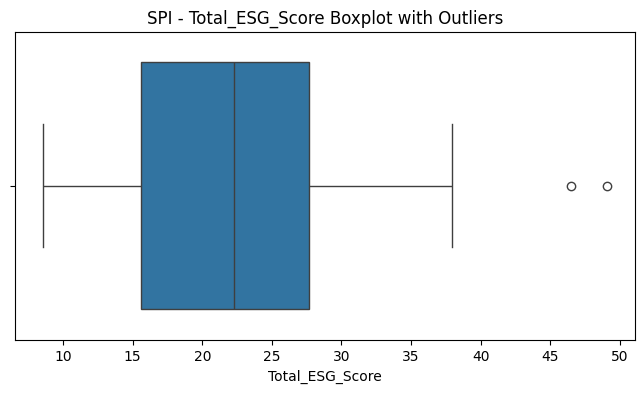

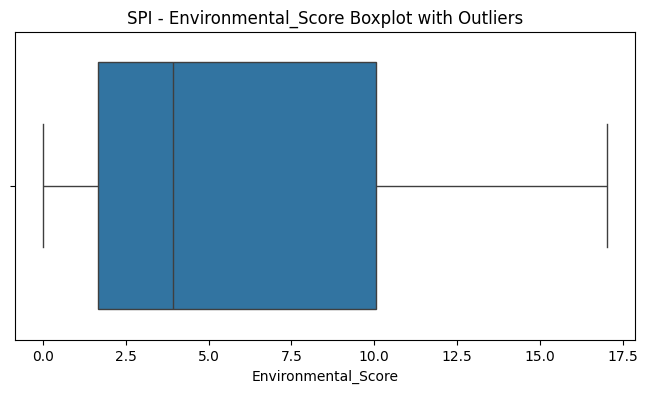

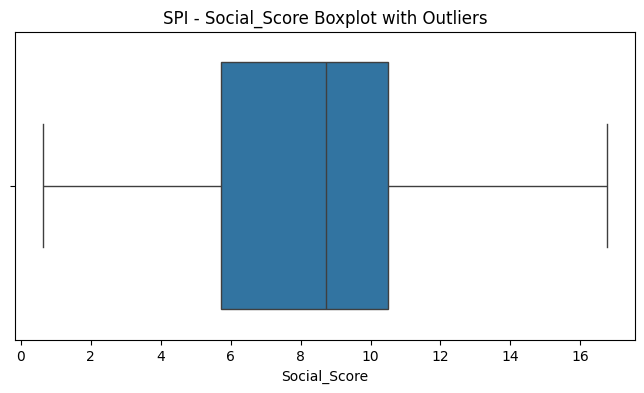

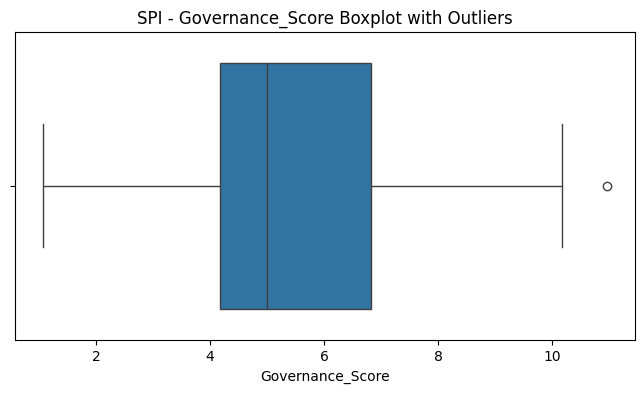

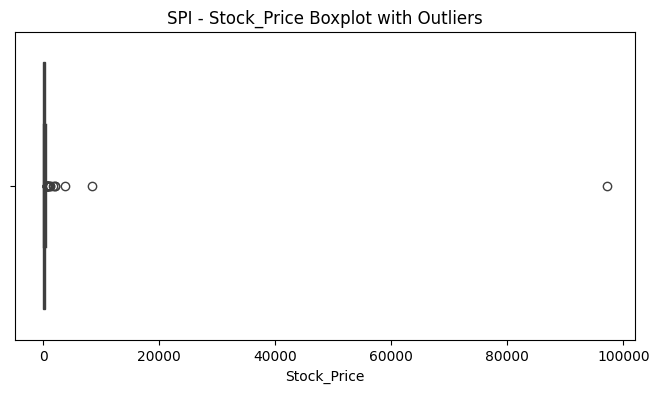

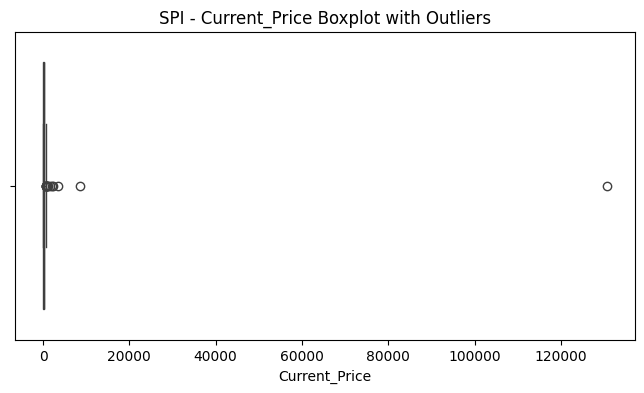

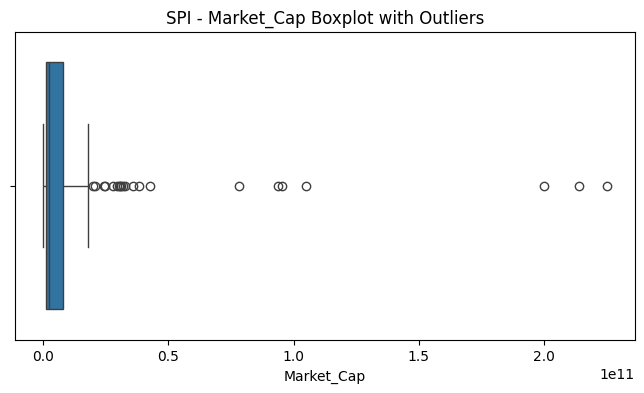

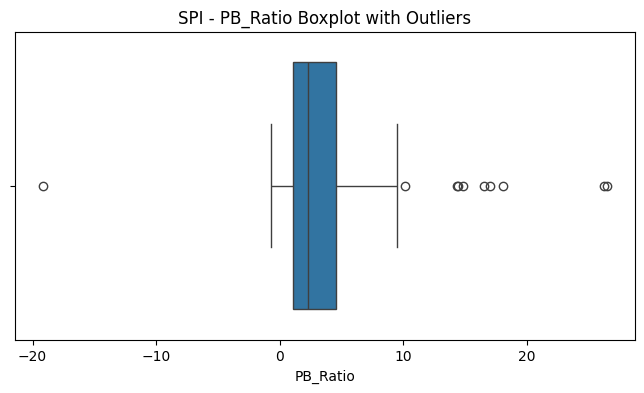

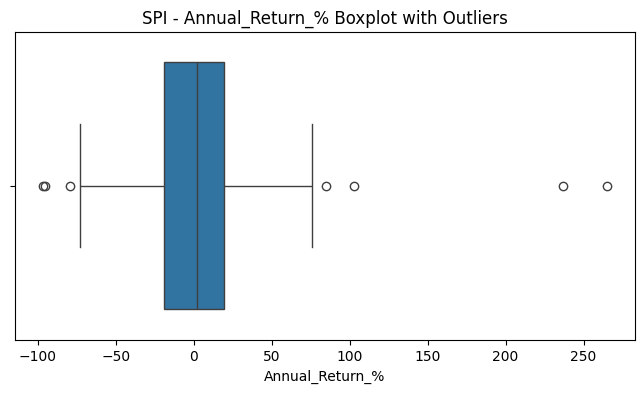

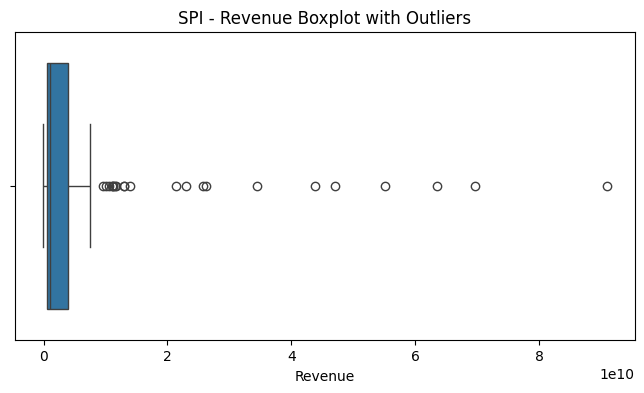

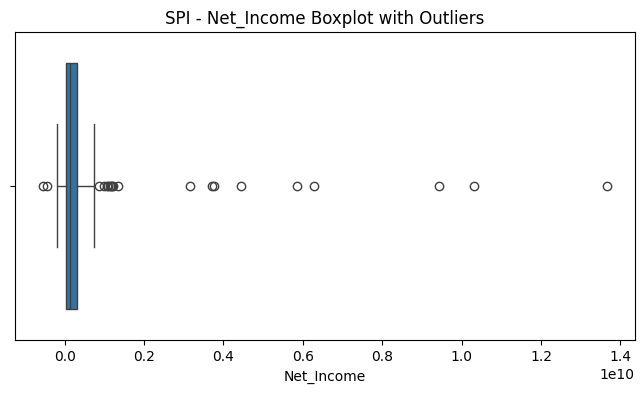

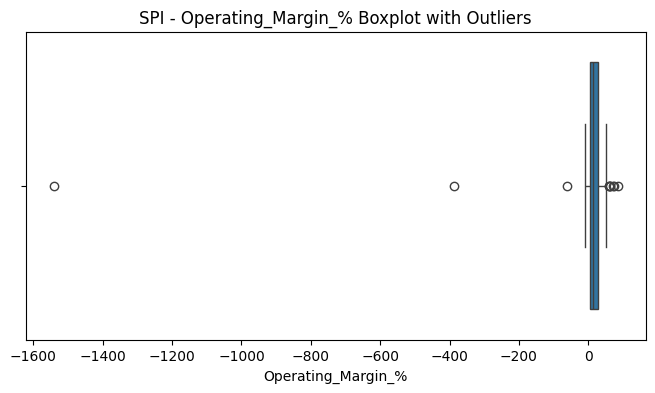

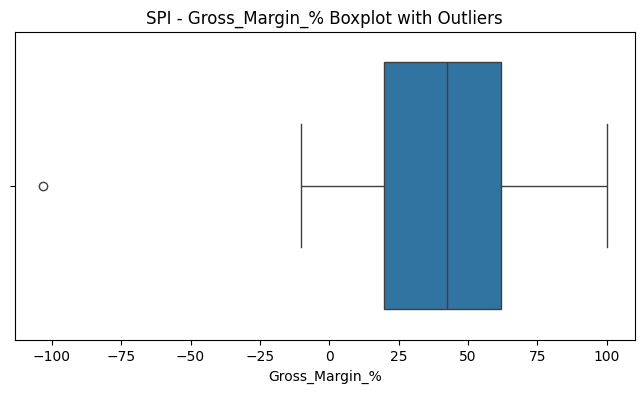

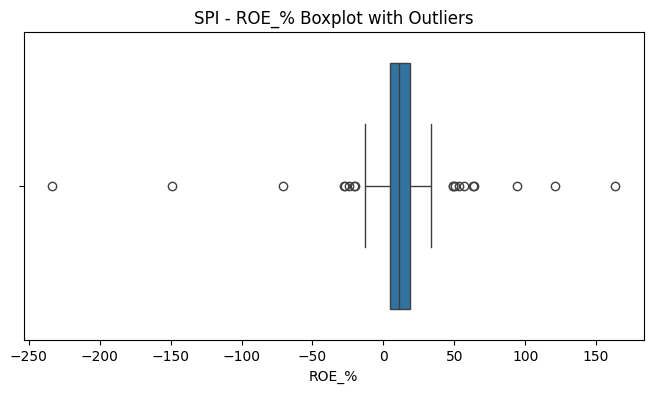

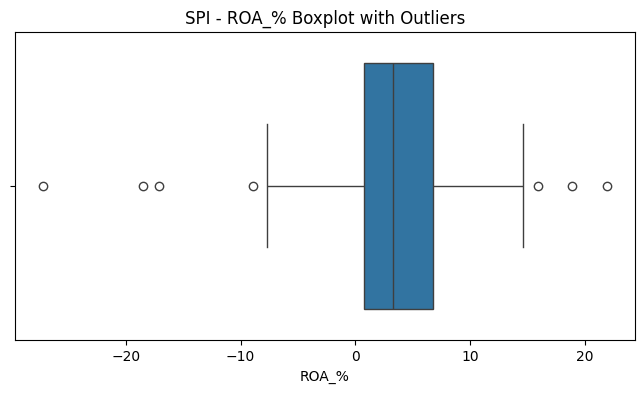

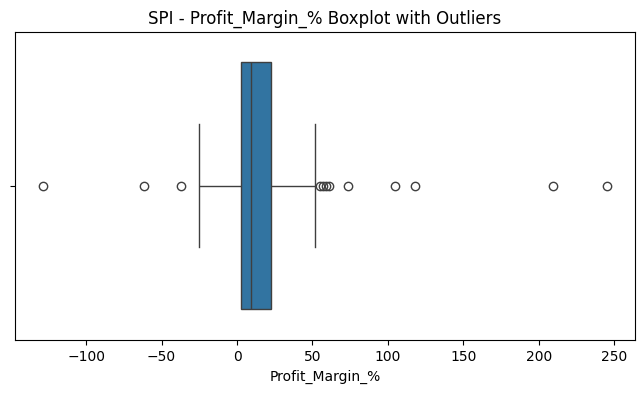

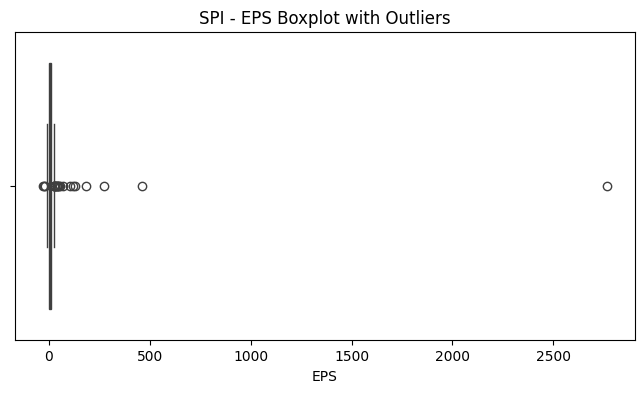

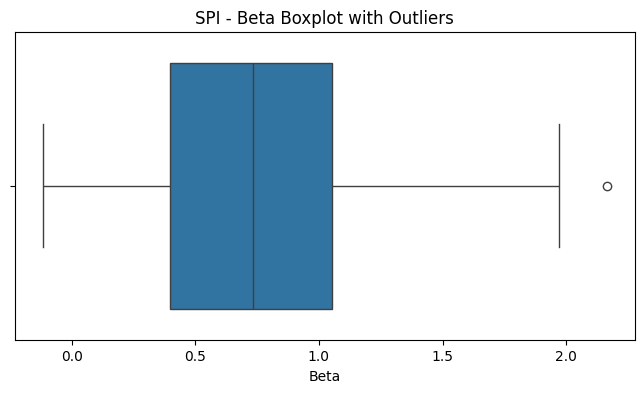

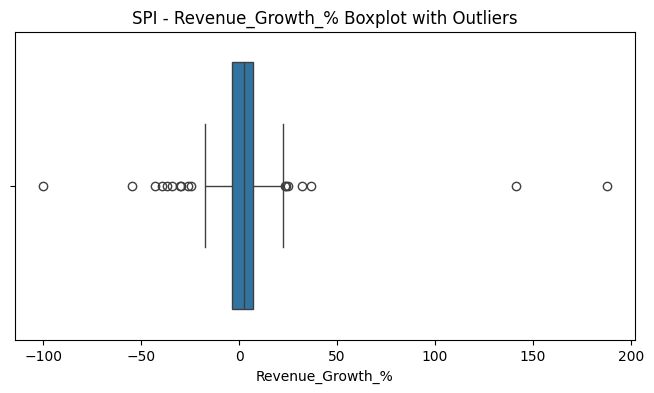

In [39]:
plot_outliers(spi_esg, "SPI")

Boxplots help us visually identify where extreme values occur for specific metrics. Given that our effective ESG sample size is limited, we do not handle extreme values during the data preparation stage, as such extreme values may be legitimate.

TODO: Addressing outliers (keep or remove them) during the analysis and comparison of specific metrics, based on the observed distributions

## 1.7 Enrich Dataset with Additional Information

### 1.7.1 Add Company_Type column for identification before merging

In [40]:
spi_esg['Company_Type'] = "SPI"
sp500_esg['Company_Type'] = "S&P 500"

### 1.7.2 ESG Risk Classification

Yahoo Finance utilizes Sustainalytics’ ESG Risk Ratings, which categorize companies into five levels: Negligible, Low, Medium, High, and Severe. These ratings are visually represented using ESG Globe icons, where **Low numbers indicate a low risk, whereas higher numbers indicate a higher risk**. This classification is widely used in ESG data analysis and investment decision-making.

**ESG Risk Categories at Overall Level** 
(according to [ESG Risk Ratings Methodology](https://www.sustainalytics.com/docs/knowledgehublibraries/default-document-library/sustainalytics_-esg-risk-ratings_-version-3-1_-methodology-abstract_-june-2024.pdf))

A company’s ESG Risk Ratings score on Overall Level is assigned to one of five ESG risk categories in the ESG Risk Ratings:
- Negligible risk (overall unmanaged risk score between 0 and 9.99 points): ESG factors are considered to drive negligible risk to enterprise value.
- Low risk (overall unmanaged risk score between 10 and 19.99 points): ESG factors are considered to drive low risk to enterprise value.
- Medium risk (overall unmanaged risk score between 20 and 29.99 points): ESG factors are considered to drive medium risk to enterprise value.
- High risk (overall unmanaged risk score between 30 and 39.99 points): ESG factors are considered to drive high risk to enterprise value.
- Severe risk (overall unmanaged risk score 40 points and above): ESG factors are considered to drive severe risk to enterprise value.

Note: Because ESG risks materialize at an unknown time in the future and depend on a variety of unpredictable conditions, no predictions on financial or share price impacts, or on the time horizon of such impacts, are intended or implied by these risk categories.

In [41]:
def categorize_esg_risk(score):
    if pd.isna(score):
        return np.nan
    elif score < 10:
        return 'Negligible'
    elif score < 20:
        return 'Low'
    elif score < 30:
        return 'Medium'
    elif score < 40:
        return 'High'
    else:
        return 'Severe'
    
spi_esg['ESG_Risk_Category'] = spi_esg['Total_ESG_Score'].apply(categorize_esg_risk)
spi_esg['ESG_Risk_Category'] = spi_esg['ESG_Risk_Category'].astype('category')

In [42]:
sp500_esg['ESG_Risk_Category'] = sp500_esg['Total_ESG_Score'].apply(categorize_esg_risk)
sp500_esg['ESG_Risk_Category'] = sp500_esg['ESG_Risk_Category'].astype('category')

### 1.7.2 Reorder columns for better readability

In [42]:
cols = list(spi_esg.columns)
cols.remove('Company_Type')
idx = cols.index('Company_Name') + 1
cols.insert(idx, 'Company_Type')
spi_esg = spi_esg[cols]

In [43]:
cols = list(spi_esg.columns)
cols.remove('ESG_Risk_Category')
idx = cols.index('Country') + 1
cols.insert(idx, 'ESG_Risk_Category')
spi_esg = spi_esg[cols]

In [44]:
cols = list(sp500_esg.columns)
cols.remove('Company_Type')
idx = cols.index('Company_Name') + 1
cols.insert(idx, 'Company_Type')

cols.remove('ESG_Risk_Category')
idx = cols.index('Country') + 1
cols.insert(idx, 'ESG_Risk_Category')

sp500_esg = sp500_esg[cols]

## 1.8 Format Dataset for Analysis

### 1.8.1 Remove columns with identical value

In [45]:
esg_clean = pd.concat([spi_esg, sp500_esg], ignore_index=True)

In [46]:
cols_to_drop = [col for col in esg_clean.columns if esg_clean[col].nunique() == 1]

esg_clean = esg_clean.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)

Dropped columns: ['Data_Date', 'Status']


### 1.8.2 Save Cleaned Datasets

In [47]:
esg_clean.to_csv("Data/cleaned_combined_data.csv", index=False)

# 2 Light Exploratory Data Analysis
- Industry Distribution
- ESG Distribution

## 2.1 Industry Distribution

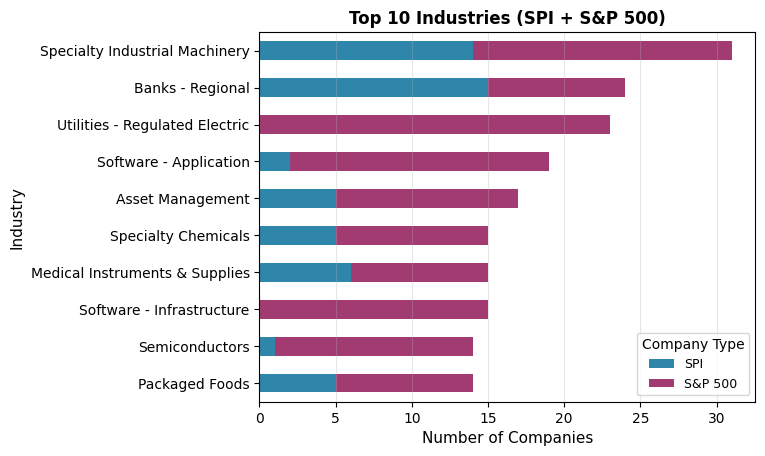

In [48]:
# Top 10 industries by overall company count
top_industries = esg_clean['Industry'].value_counts().head(10).index
top_ind = esg_clean[esg_clean['Industry'].isin(top_industries)]

industry_type_counts = pd.crosstab(top_ind['Industry'], top_ind['Company_Type'])
industry_type_counts = industry_type_counts[['SPI', 'S&P 500']]
industry_type_counts['Total'] = industry_type_counts.sum(axis=1)
industry_type_counts = industry_type_counts.sort_values(by='Total', ascending=True)
industry_type_counts = industry_type_counts.drop(columns='Total')

# figure
industry_type_counts.plot(kind='barh', stacked=True, 
                         color=['#2E86AB', '#A23B72'])

plt.xlabel('Number of Companies', fontsize=11)
plt.ylabel('Industry', fontsize=11)
plt.title('Top 10 Industries (SPI + S&P 500)', fontsize=12, fontweight='bold')
plt.legend(title='Company Type', fontsize=9)
plt.grid(axis='x', alpha=0.3)

plt.show()

**Top 10 Industries according to SPI counts**

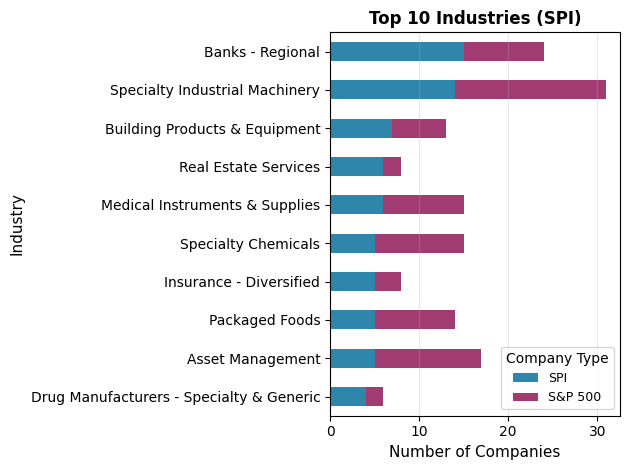

In [49]:
spi_companies = esg_clean[esg_clean['Company_Type'] == 'SPI']
top_spi_industries = spi_companies['Industry'].value_counts().head(10).index

top_spi_ind = esg_clean[esg_clean['Industry'].isin(top_spi_industries)]

industry_spi_counts = pd.crosstab(top_spi_ind['Industry'], top_spi_ind['Company_Type'])
industry_spi_counts = industry_spi_counts[['SPI', 'S&P 500']]
industry_spi_counts = industry_spi_counts.sort_values(by='SPI', ascending=True)

industry_spi_counts.plot(kind='barh', stacked=True, 
                          color=['#2E86AB', '#A23B72'])

plt.xlabel('Number of Companies', fontsize=11)
plt.ylabel('Industry', fontsize=11)
plt.title('Top 10 Industries (SPI)', fontsize=12, fontweight='bold')
plt.legend(title='Company Type', fontsize=9)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.show()

## 2.2 ESG Distribution

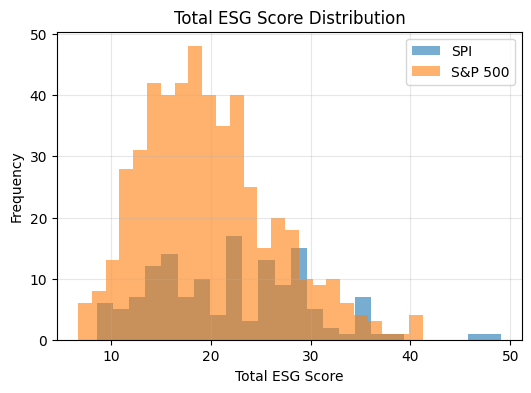

In [50]:
plt.figure(figsize=(6,4))
plt.hist(esg_clean[esg_clean['Company_Type']=='SPI']['Total_ESG_Score'].dropna(), bins=25, alpha=0.6, label='SPI')
plt.hist(esg_clean[esg_clean['Company_Type']=='S&P 500']['Total_ESG_Score'].dropna(), bins=25, alpha=0.6, label='S&P 500')
plt.xlabel('Total ESG Score')
plt.ylabel('Frequency')
plt.title('Total ESG Score Distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/tmp/ipykernel_20912/123533497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
/tmp/ipykernel_20912/123533497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
/tmp/ipykernel_20912/123533497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
/tmp/ipykernel_20912/123533497.py:8: Future

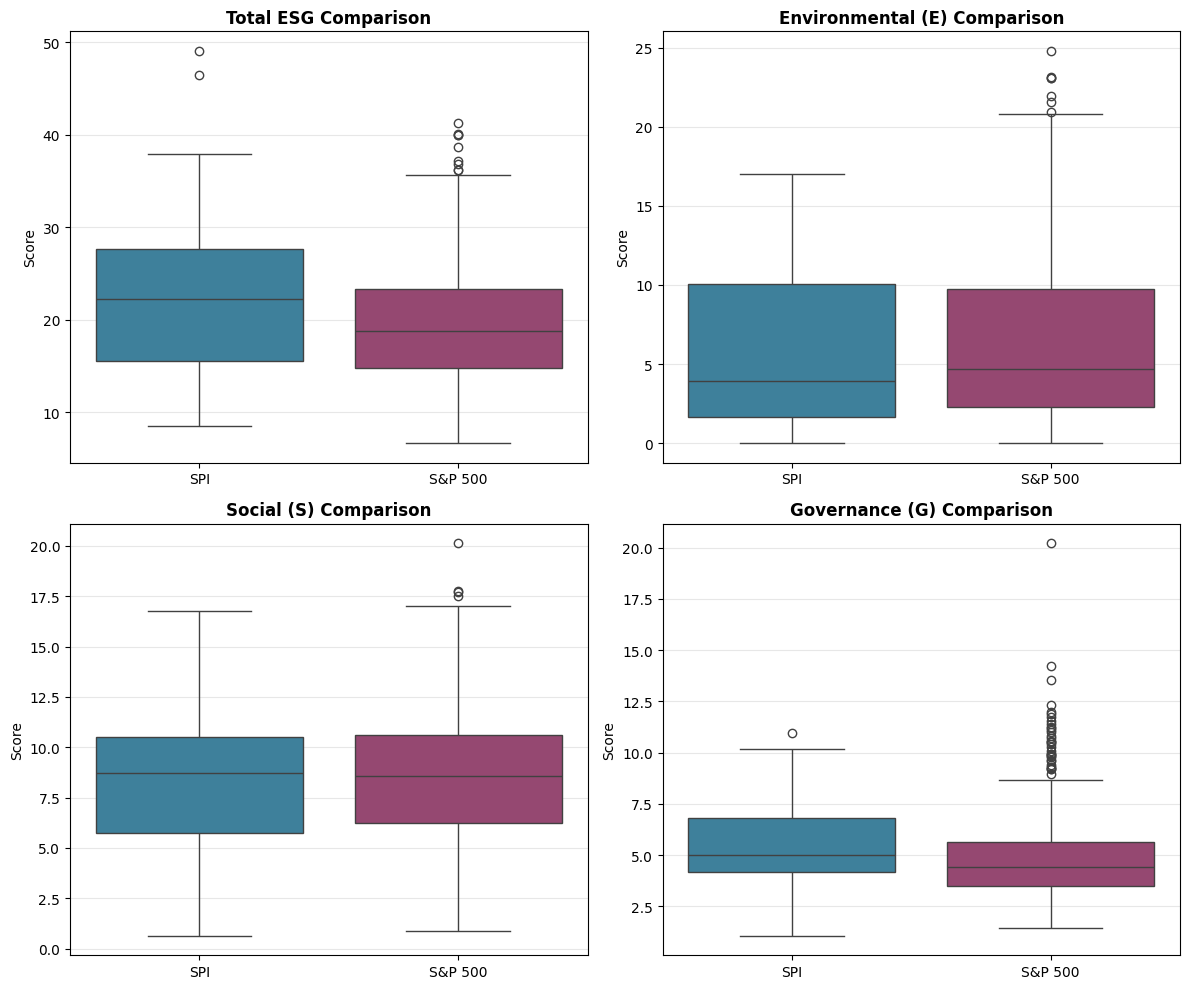

In [51]:
esg_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score']
esg_labels = ['Total ESG', 'Environmental (E)', 'Social (S)', 'Governance (G)']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(esg_cols):
    sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
    axes[i].set_title(f'{esg_labels[i]} Comparison', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

<Figure size 700x400 with 0 Axes>

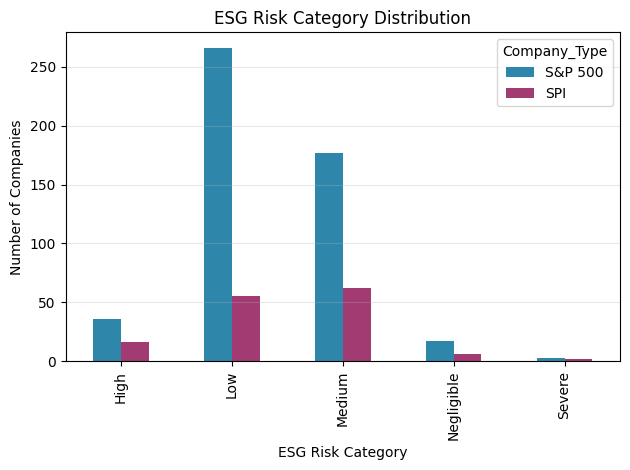

In [52]:
plt.figure(figsize=(7,4))
pd.crosstab(esg_clean['ESG_Risk_Category'], esg_clean['Company_Type']).plot(kind='bar', color=['#2E86AB', '#A23B72'])
plt.xlabel('ESG Risk Category')
plt.ylabel('Number of Companies')
plt.title('ESG Risk Category Distribution')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
esg_means = esg_clean.groupby('Company_Type')[esg_cols].mean().round(2)
print(esg_means)

              Total_ESG_Score  Environmental_Score  Social_Score  \
Company_Type                                                       
S&P 500                 19.70                 6.28          8.55   
SPI                     22.15                 5.72          8.23   

              Governance_Score  
Company_Type                    
S&P 500                   4.88  
SPI                       5.48  
